# Influence Lines

This notebook demonstrates the use of `PyCBA` in obtaining influence lines for arbitary beams.

First, the usual imports

In [1]:
import pycba as cba
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

## Example 1 - Basic Use

Here we take a reasonably complex beam configuration and seek two influence lines for it:

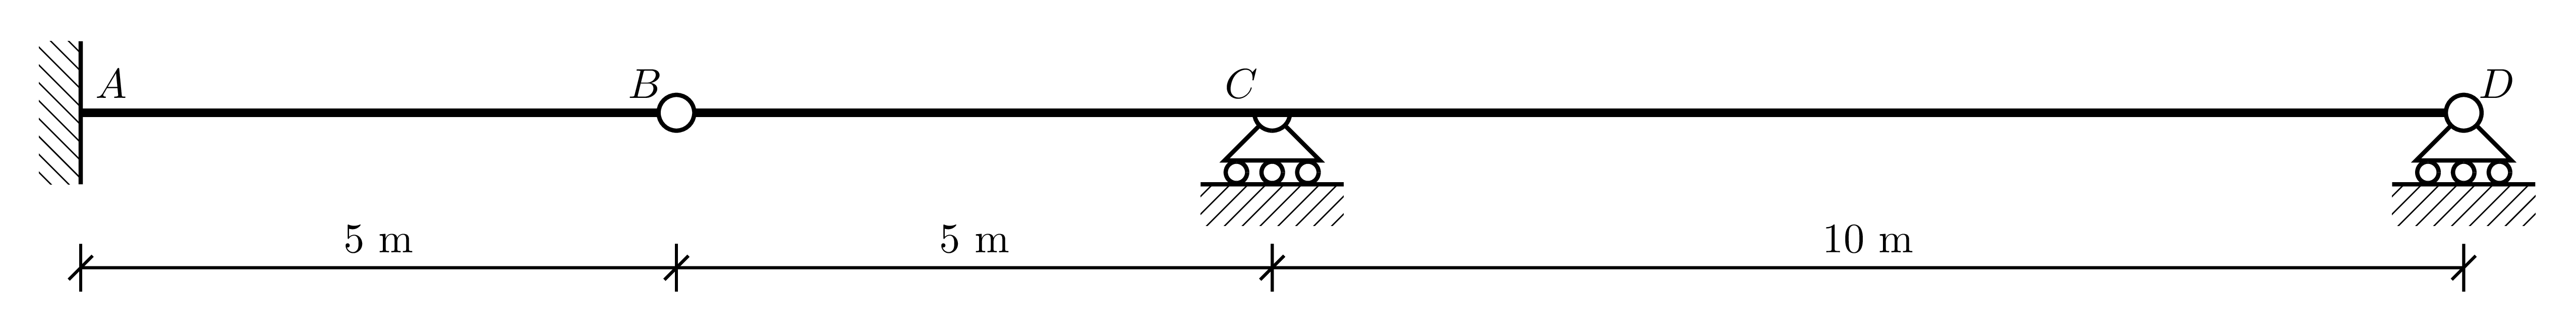

In [2]:
display.Image("./images/il_ex_1.png",width=800)

In [3]:
L = [5, 5, 10]
EI = 30 * 600e7 * np.ones(len(L)) * 1e-6
eType = [2, 1, 1]
R = [-1, -1, 0, 0, -1, 0, -1, 0]

Next, create the `InfluenceLines` object from `PyCBA` by passing in the beam configuration information. Note that no loading information is requried (of course). And then we create the influence lines, passing in the `step` parameter - the increment in which the unit load is traversed across the structure.

In [4]:
ils = cba.InfluenceLines(L, EI, R, eType)
ils.create_ils(step=0.5)

`PyCBA` "brute force" calculates the influence lines, and so all are now available with no further computation necessary. Here we just plot two examples on axes that we have pre-created:
- the shear force (`"V"`) at $15$ m along the beam
- the vertical reaction (`"R"`) at $0$ m along the beam

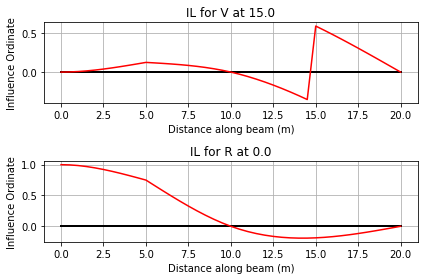

In [5]:
fig, axs = plt.subplots(2, 1)
ils.plot_il(15.0, "V", axs[0])
ils.plot_il(0.0, "R", axs[1])

If the actual influence abcissa ($x$) and ordinates (denoted $\eta$) are required, they can be got as follows:

In [6]:
(x, eta) = ils.get_il(15.0, "V")
print(eta)

[ 0.          0.0018125   0.007       0.0151875   0.026       0.0390625
  0.054       0.0704375   0.088       0.1063125   0.125       0.1186875
  0.112       0.1045625   0.096       0.0859375   0.074       0.0598125
  0.043       0.0231875   0.         -0.02684375 -0.05725    -0.09103125
 -0.128      -0.16796875 -0.21075    -0.25615625 -0.304      -0.35409375
  0.59375     0.53971875  0.484       0.42678125  0.36825     0.30859375
  0.248       0.18665625  0.12475     0.06246875  0.        ]


## Example 2 - Beam Strings

The definition of beam configurations for influence lines can be made simpler because:

1. no loading information is required
2. deflection influence lines are rarely sought, and so the flexural rigidity can be assumed as a nominal value

Thus, with the assumption that the beam is prismatic, beams can be more easily defined for influence line generation by a "beam string". Please refer to the documentation for the defintions of terms for the beam string (`pycba.utils.parse_beam_string`).

Here we define a four-span beam (30 m equal spans) with fixed end supports and a hinge at the middle using a beam string, and parse it for the inputs to the `InfluenceLines` object, from which we proceed as usual:

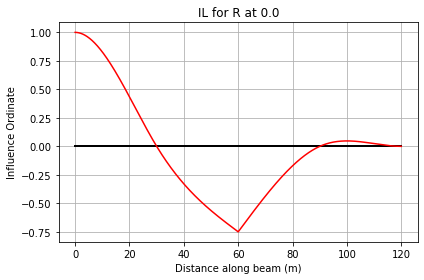

In [7]:
beam_string = "E30R30H30R30E"
(L, EI, R, eType) = cba.parse_beam_string(beam_string)
ils = cba.InfluenceLines(L, EI, R, eType)
ils.create_ils(step=0.05)
ils.plot_il(0.0, "R")